**Paul Telford - World Population Growth Extra-credit**

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.
The UN population division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

https://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/

In this exercise, we will examine some of the factors that influence population growth and how they are changing around the world.
The first DataFrame to be loaded is the total population for each country beginning in 1800.

In the final part of this exercise, you the reader, will have access to a widget that will allow you to witness the evolution of two of the key factors that influence population growth... Please enjoy!

All data used for this exercise were accessed through https://www.pewresearch.org/ and https://www.gapminder.org/data/

At this point, you can select Kernel, then restart and run all. All of the cells should run and you can read through this notebook and use the code to follow along.

In [1]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import sys
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [2]:
population = pd.read_csv('population.csv')
population['geo'] = population['geo'].str.upper()
population = population.rename(columns={'geo': 'Alpha-3 code', 'time': 'Year', 'population_total': 'Total population'})
population.head() # view the first five items

,Alpha-3 code,Year,Total population
0,ABW,1800,19286
1,ABW,1801,19286
2,ABW,1802,19286
3,ABW,1803,19286
4,ABW,1804,19286


Next we'll load the country_codes DataFrame to merge with the population DataFrame in order to identify the countries by name rather than their Alpha-3 code.

In [3]:
country_codes = pd.read_csv('country_codes.csv') # load Dataframe
country_codes = country_codes.drop(labels=['Alpha-2 code', 'Numeric code', 'Latitude (average)', 'Longitude (average)'], axis=1)
country_codes = country_codes.drop_duplicates()

country_codes.head() # view the first five items

,Country,Alpha-3 code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


Lets merge the population and country_codes DataFrames to make it easier to identify the countries by their names rather than their Alpha-3 code.

In [4]:
countries_pop = country_codes.merge(population, how='inner', on='Alpha-3 code')
countries_pop.head() # view the first five items

,Country,Alpha-3 code,Year,Total population
0,Afghanistan,AFG,1800,3280000
1,Afghanistan,AFG,1801,3280000
2,Afghanistan,AFG,1802,3280000
3,Afghanistan,AFG,1803,3280000
4,Afghanistan,AFG,1804,3280000


Let's begin by taking a close look at the population of Bangladesh for periods of five years at a time beginning in 1970 through 2015 (inclusive).

In [5]:
bang_pop = countries_pop.loc[countries_pop['Country'] == 'Bangladesh']
years = np.arange(1970, 2016, 5)
bang_pop_five = bang_pop.loc[bang_pop['Year'].isin(years)]

bang_pop_five

,Country,Alpha-3 code,Year,Total population
6086,Bangladesh,BGD,1970,65048701
6091,Bangladesh,BGD,1975,71247153
6096,Bangladesh,BGD,1980,81364176
6101,Bangladesh,BGD,1985,93015182
6106,Bangladesh,BGD,1990,105983136
6111,Bangladesh,BGD,1995,118427768
6116,Bangladesh,BGD,2000,131280739
6121,Bangladesh,BGD,2005,142929979
6126,Bangladesh,BGD,2010,151616777
6131,Bangladesh,BGD,2015,160995642


Now let's look at Bangladesh's population growth rate for each five-year period from 1970 through 2015. The percent change from one period to another will be calculated using the following formula.


$$ PR = \frac{(V present - V past)}{V past} x 100 $$

Where:

$ PR $ = Percent Rate 

$ V present $ = Present or Future Value

$ V past $ = Past or Present Value 

Lets add a column to the above DataFrame that will contain the 5 year growth rate for Bangladesh.

In [6]:
def growth_rate(col):
    '''
    Computes the population growth rate
    '''
    gr = []
    for i in range(len(col) - 1):
        gr.append(((col.iloc[i+1] - col.iloc[i])/col.iloc[i])/5)
            
    return pd.Series(gr)

years_2010 = np.arange(1970, 2011, 5)
bang_pop_five_thr2010 = bang_pop_five.loc[bang_pop_five['Year'].isin(years_2010)].reset_index(drop=True)
bang_pop_five_thr2010['Growth rate'] = growth_rate(bang_pop_five['Total population'])

# Apply formatting to the Total population column to make it more readable
bang_pop_five_thr2010['Total population'] = bang_pop_five_thr2010.apply(lambda x: "{:,}".format(x['Total population']), axis=1)

# Apply percent formatting to the Growth rate column.
bang_pop_five_thr2010['Growth rate'] = bang_pop_five_thr2010.apply(lambda x: "{:%}".format(x['Growth rate']), axis=1)
bang_pop_five_thr2010

,Country,Alpha-3 code,Year,Total population,Growth rate
0,Bangladesh,BGD,1970,"65,048,701",1.905788%
1,Bangladesh,BGD,1975,"71,247,153",2.839980%
2,Bangladesh,BGD,1980,"81,364,176",2.863915%
3,Bangladesh,BGD,1985,"93,015,182",2.788352%
4,Bangladesh,BGD,1990,"105,983,136",2.348417%
5,Bangladesh,BGD,1995,"118,427,768",2.170601%
6,Bangladesh,BGD,2000,"131,280,739",1.774707%
7,Bangladesh,BGD,2005,"142,929,979",1.215532%
8,Bangladesh,BGD,2010,"151,616,777",1.237180%


As seen in the 'Growth rate' column of the DataFrame above, while the population has grown every five years since 1970, the annual growth rate decreeased dramatically from 1985 to 2005. Let's look at some other information in order to develop a possible explanation. We'll begin by looking at the birth rate per 1000 population in Bangladesh during the same period (1970 to 2010) considered above.

In [7]:
crude_birth_rate = pd.read_csv('crude_birth_rate_births_per_1000_population.csv')
crude_birth_rate.head() # view the first five items

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,39.5,39.5,39.5,39.5,39.5,39.5,39.5,39.5,39.5,...,12.0,11.7,11.4,11.1,10.8,10.6,10.4,10.2,10.1,10.0
1,Afghanistan,48.1,48.1,48.1,48.1,48.1,48.1,48.1,48.1,48.1,...,43.9,42.8,41.6,40.3,38.9,37.6,36.4,35.3,34.2,33.3
2,Angola,47.7,47.7,47.7,47.7,47.7,47.7,47.7,47.8,47.8,...,49.3,48.9,48.5,48.0,47.5,47.0,46.5,46.0,45.5,45.0
3,Albania,32.9,32.9,32.9,32.9,32.9,32.9,32.9,32.9,32.9,...,11.9,11.6,11.6,11.7,11.9,12.3,12.7,13.1,13.4,13.6
4,Netherlands Antilles,40.5,40.5,40.5,40.5,40.5,40.5,40.5,40.5,40.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The crude_birth_rate DataFrame needs to be unpivoted from wide to long format to match the population DataFrame where the years are considered to be values rather than column labels.


In [8]:
def melt(df, col_vals, key, value):
    """
    This is a customized melt function to unpivot the birth rates DataFrame.
    """
    assert type(df) is pd.DataFrame
    
    keep_vars = df.columns.difference(col_vals)
    melted_sections = []
    for c in col_vals:
        melted_c = df[keep_vars].copy()
        melted_c[key] = c
        melted_c[value] = df[c]
        melted_sections.append(melted_c)
    melted = pd.concat(melted_sections)
    return melted
    
year_cols = crude_birth_rate.columns[1:]
key = 'Year'
value = 'Birth rate'

birth_rate = melt(crude_birth_rate, year_cols, key, value) # call melt function to unpivot
birth_rate = birth_rate.rename(columns={'country': 'Country'})
birth_rate['Year'] = pd.to_numeric(birth_rate['Year'])

bang_birth_rate = birth_rate.loc[birth_rate['Country'] == 'Bangladesh']

br_years = np.arange(1970, 2011)
bang_birth_rate = bang_birth_rate.loc[bang_birth_rate['Year'].isin(br_years)].reset_index(drop=True)

bang_birth_rate.head() # view the first five items

,Country,Year,Birth rate
0,Bangladesh,1970,47.5
1,Bangladesh,1971,47.1
2,Bangladesh,1972,46.7
3,Bangladesh,1973,46.3
4,Bangladesh,1974,45.8


It's obvious that the birth rate in Balgladesh declined during the same period. Lets create a plot to have a clearer view of the decline in births per 1000 population.

<AxesSubplot:xlabel='Year'>

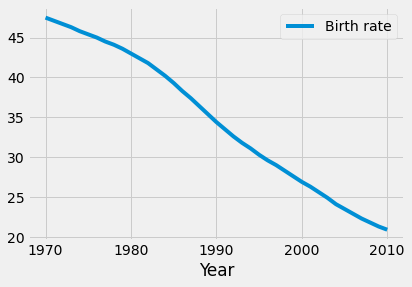

In [9]:
bang_birth_rate.plot(1, 2)

Now let's have a look at the gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices) for Bangladesh during the same period covered above.

In [10]:
income_per_capita = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
income_years = income_per_capita.columns[1:]
key = 'Year'
value = 'Adjusted GDP ($)'

# This DataFrame needs to be unpivoted
Adj_income_per_capita = melt(income_per_capita, income_years, key, value) # Unpivot
Adj_income_per_capita = Adj_income_per_capita.rename(columns={'country': 'Country'}) # Rename

# Convert the year and GDP columns from string to numeric dtype for use in computations
Adj_income_per_capita['Year'] = pd.to_numeric(Adj_income_per_capita['Year']) 

# Select Bangladesh
Adj_income_per_capita = Adj_income_per_capita.loc[Adj_income_per_capita['Country'] == 'Bangladesh']
inc_years = np.arange(1970, 2011)

# Select the years of interest
Adj_income_per_capita = Adj_income_per_capita.loc[Adj_income_per_capita['Year'].isin(inc_years)].reset_index(drop=True)
Adj_income_per_capita['Adjusted GDP ($)'] = pd.to_numeric(Adj_income_per_capita['Adjusted GDP ($)'])
Adj_income_per_capita.head() # view the first five items

,Country,Year,Adjusted GDP ($)
0,Bangladesh,1970,1200
1,Bangladesh,1971,1040
2,Bangladesh,1972,1030
3,Bangladesh,1973,1150
4,Bangladesh,1974,1120


<AxesSubplot:xlabel='Year'>

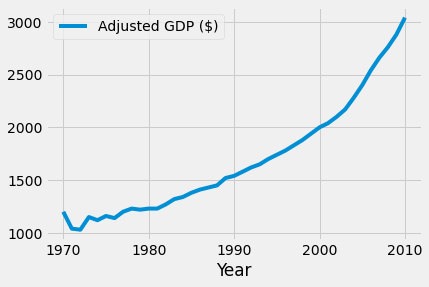

In [11]:
Adj_income_per_capita.plot(1, 2)

Looking at the Adjusted GDP column in the table above, we get a general sense of increasing adjusted gross domestic product (income) over the same period. We can look at the correlation between the Adjusted GDP and Birth rate, however, it is important to note at this juncture that "Correlation does not imply causation."
First, let's use a scatter plot to see if we can eyeball the strength and direction of the relationship before attempting to quantify it.

In [12]:
bang_birth_rate_and_income = bang_birth_rate.copy()
bang_birth_rate_and_income['Adjusted GDP ($)'] = Adj_income_per_capita['Adjusted GDP ($)']
bang_birth_rate_and_income.head() # view the first five items

,Country,Year,Birth rate,Adjusted GDP ($)
0,Bangladesh,1970,47.5,1200
1,Bangladesh,1971,47.1,1040
2,Bangladesh,1972,46.7,1030
3,Bangladesh,1973,46.3,1150
4,Bangladesh,1974,45.8,1120


Text(0, 0.5, 'Birth rate per 1000')

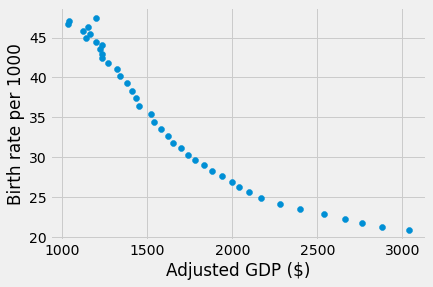

In [13]:
plots.scatter(bang_birth_rate_and_income['Adjusted GDP ($)'], bang_birth_rate_and_income['Birth rate'])
plots.xlabel("Adjusted GDP ($)")
plots.ylabel("Birth rate per 1000")

Let's attempt to quantify the relationship by looking at their **Correlation** (how one variable changes with respect to the other).
We begin by computing the $Covariance$, a statistic for quantifying the relationship between variables by showing their joint variance:

$$ cov_{(X,Y)} = E[(X - E[X])(Y - E[Y])] $$

$E[X]$ is read as the expected value of **X** or the expectation of **X**. It is calculated by summing all the possible values of **X** multiplied by their probability - it's the long-run average of **X**.

The sign of the **Covariance** tells us if the variables are positively or negatively correlated. However, we would also like to quantify how *strong* the relationship is between the variables.

**Correlation** tells us how variables change together, both in direction (same or opposite) and in magnitude (strength of the relationship). To find the correlation, we calculate the **Pearson correlation coefficient** by dividing covariance by the product of the standard diviations of the variables:

$$ \rho_{X,Y} = \frac{cov(X,Y)}{(S^{DV}_X)(S^{DV}_Y)} $$

This normalizes the covariance and results in a statistic bound between -1 and 1, making it easy to describe both the direction of the correlation (*sign*) and the strength of it (*magnitude*). Correlations of 1 are said to be perfect positive (linear) correlations, while those of -1 are perfect negative correlations. Values near 0 are **not** correlated. If correlation coefficients are near 1 in absolute value, then the variables are said to be strongly correlated; those near 0.5 are said to be weakly correlated.

In [14]:
x = bang_birth_rate_and_income['Adjusted GDP ($)'].tolist()
y = bang_birth_rate_and_income['Birth rate'].tolist()

# Compute the x and y means
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute the standard deviations for both x and y
x_std_dev = np.std(x)
y_std_dev = np.std(y)

# Compute the covariance
cov_temp_sum = 0
for n in range(len(x)):
    cov_temp_sum += (x[n] - x_mean) * (y[n] - y_mean)
    
covariance = cov_temp_sum / len(x)

# Compute the Correlation coeficient.
rho = covariance / (x_std_dev * y_std_dev)
rho

-0.9451810971871666

With $ \rho = - 0.945 $, there's a strong negative correlation between the **Adjusted per capita GDP** and **Birth rate** in Balgladesh during the highlighted period; as the **Adjusted per capita GDP** increased, the **Birth rate** decreased.

Now let's look at another two variables, women fertility and child mortalities per 1000 born in Balgladesh during the same period.

The fertility DataFrame contains a statistic that is often used to measure how many babies are being born, the total fertility rate. This number describes the number of children a woman has in her lifetime, on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49.

In [15]:
fertility = pd.read_csv('fertility.csv')
fertility = fertility.rename(columns={'geo': 'Country', 'time': 'Year', 'children_per_woman_total_fertility': 'Children per woman'})
fertility['Country'] = fertility['Country'].str.upper()
bang_fertility = fertility.loc[fertility['Country'] == 'BGD']
fert_years = np.arange(1970, 2011)
bang_fertility = bang_fertility.loc[fertility['Year'].isin(fert_years)].reset_index(drop=True)
bang_fertility.head() # view the first five items

,Country,Year,Children per woman
0,BGD,1970,6.95
1,BGD,1971,6.94
2,BGD,1972,6.93
3,BGD,1973,6.90
4,BGD,1974,6.87


Next we'll load the Child Mortality per 1000 children born DataFrame.

In [16]:
child_mortality = pd.read_csv('child_mortality.csv') # Read the csv file into a DataFrame

# Rename the columns for consistency
child_mortality = child_mortality.rename(columns={'geo': 'Country', 'time': 'Year'})
child_mortality = child_mortality.rename(columns={'child_mortality_0_5_year_olds_dying_per_1000_born': 'Child mortality'})
child_mortality['Country'] = child_mortality['Country'].str.upper()
bang_child_mortality = child_mortality.loc[child_mortality['Country'] == 'BGD'] # Select only Bangladesh
mort_years = np.arange(1970, 2011)
bang_child_mortality = bang_child_mortality.loc[bang_child_mortality['Year'].isin(mort_years)].reset_index(drop=True)
bang_child_mortality.head() # view the first five items

,Country,Year,Child mortality
0,BGD,1970,224.1
1,BGD,1971,223.0
2,BGD,1972,222.0
3,BGD,1973,220.7
4,BGD,1974,219.1


In [17]:
bang_fert_with_child_mort = bang_fertility.copy()
bang_fert_with_child_mort['Child mortality'] = bang_child_mortality['Child mortality'] # Merge
bang_fert_with_child_mort.head() # view the first five items

,Country,Year,Children per woman,Child mortality
0,BGD,1970,6.95,224.1
1,BGD,1971,6.94,223.0
2,BGD,1972,6.93,222.0
3,BGD,1973,6.90,220.7
4,BGD,1974,6.87,219.1


Text(0, 0.5, 'Child mortality per 1000 born')

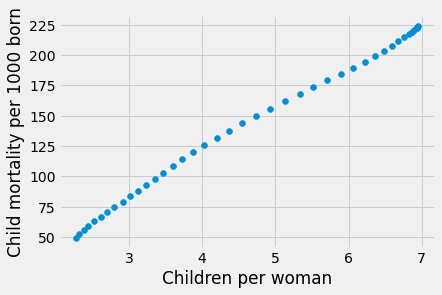

In [18]:
plots.scatter(bang_fert_with_child_mort['Children per woman'], bang_fert_with_child_mort['Child mortality'])
plots.xlabel("Children per woman")
plots.ylabel("Child mortality per 1000 born")

Let's qualtify this relationship as well.

Unlike a more recent version of python, version 3.9 does not contain functions for computing **Covariance** and **Correlation**. Therefore, we'll need to complete the same setup as above.

In [19]:
f_x = bang_fert_with_child_mort['Children per woman'].tolist()
m_y = bang_fert_with_child_mort['Child mortality'].tolist()

# Compute the x and y means
f_mean = np.mean(f_x)
m_mean = np.mean(m_y)

# Compute the standard deviations for both x and y
f_std_dev = np.std(f_x)
m_std_dev = np.std(m_y)

# Compute the covariance
cov_run_sum = 0
for n in range(len(f_x)):
    cov_run_sum += (f_x[n] - f_mean) * (m_y[n] - m_mean)

    
# Compute the Correlation coeficient.
fm_covariance = cov_run_sum / len(f_x)
fm_rho = fm_covariance / (f_std_dev * m_std_dev)
fm_rho

0.9981340362725343

With $ \rho = 0.998 $, there's a nearly perfect positive correlation between the **Children per woman** in terms of fertility and **Child mortality** per 1000 born in Balgladesh during the highlighted period; as the **Children per woman** increased, the **Children per woman** increased.

The change observed in Bangladesh since 1970 can also be observed in many other developing countries: health services improve, life expectancy increases, and child mortality decreases. At the same time, the fertility rate often plummets, and so the population growth rate decreases despite increasing longevity.

Lets begin the final part of this exercise by looking at the 50 most populous countries in the year 2010. We'll use this list of countries to create a DataFrame consisting of four columns; *Country*, *Alpha-3 code*, *Year*, and *Total population* for these countries from the year 1960 onward.

In [20]:
big_50 = countries_pop.loc[countries_pop['Year'] == 2010]
big_50 = big_50.sort_values(by=['Total population'], ascending=False).drop_duplicates(subset=['Alpha-3 code']).reset_index(drop=True)
big_50 = big_50.head(50) # select the top 50 after sorting in descending order.
population_big_50 = countries_pop.loc[countries_pop['Country'].isin(big_50['Country'].tolist())]
population_big_50 = population_big_50.loc[population_big_50['Year'] > 1959].reset_index(drop=True)
population_big_50.head() # view the first five items

,Country,Alpha-3 code,Year,Total population
0,Afghanistan,AFG,1960,8994793
1,Afghanistan,AFG,1961,9164945
2,Afghanistan,AFG,1962,9343772
3,Afghanistan,AFG,1963,9531555
4,Afghanistan,AFG,1964,9728645


Next, we'll use the names of these 50 countries to gather their *Total population*, *Children per woman*, and *Child mortality* data from any given year as follows.

In [21]:
def stats_for_year(year, pop_big_50, fertility, child_mort):
    """Return a DataFrame of Country, Total population, Children per woman, and Child mortality for each
       of the most populous country for any given year return sorted by most populous."""
    
    pop = pop_big_50.loc[pop_big_50['Year'] == year].reset_index(drop=True)
    
    # Guided by the list of 50 most populous countries, filter the fertility DataFrame and select the desired year
    fert = fertility.loc[fertility['Country'].isin(pop['Alpha-3 code'].tolist())]
    fert = fert.loc[fert['Year'] == year].reset_index(drop=True)
    
    # Guided by the list of 50 most populous countries, filter the Child Mortality DataFrame and select the desired year
    chi_mort = child_mort.loc[child_mort['Country'].isin(pop['Alpha-3 code'].tolist())]
    chi_mort = chi_mort.loc[chi_mort['Year'] == year].reset_index(drop=True)
    
    # Update the  pop DataFrame by adding 'Child per woman' and 'Child mortality' columns
    pop['Children per woman'] = fert['Children per woman']
    pop['Child mortality'] = chi_mort['Child mortality']
    pop=pop.sort_values(by=['Total population'], ascending=False).reset_index(drop=True)
    
    return pop

In [22]:
stats_for_2010 = stats_for_year(2010, population_big_50, fertility, child_mortality)
stats_for_2010.head() # view the first five items

,Country,Alpha-3 code,Year,Total population,Children per woman,Child mortality
0,China,CHN,2010,1340968737,1.54,15.7
1,India,IND,2010,1230984504,2.56,59.9
2,United States,USA,2010,309876170,1.93,7.4
3,Indonesia,IDN,2010,241613126,2.43,33.1
4,Brazil,BRA,2010,198614208,1.84,16.7


Now let's import a DataFrame that contains various country's characteristics. The world_6region column classifies each country into a region of the world.

In [23]:
countries_info = pd.read_csv('countries.csv')
countries_info = countries_info[['country', 'world_6region']]
countries_info = countries_info.rename(columns={'country': 'Alpha-3 code', 'world_6region': 'World-6 region'})
countries_info['Alpha-3 code'] = countries_info['Alpha-3 code'].str.upper()
countries_info.head() # view the first five items

,Alpha-3 code,World-6 region
0,ABKH,europe_central_asia
1,AFG,south_asia
2,AKR_A_DHE,europe_central_asia
3,ALB,europe_central_asia
4,DZA,middle_east_north_africa


Let's combine this DataFrame with the *stats_for_2010* DataFrame so that we'll see what regions of the world the 50 most populous countries of the world in 2010 belong to.

In [24]:
stats_for_2010 = stats_for_2010.merge(countries_info, how='inner', on='Alpha-3 code')
stats_for_2010.head() # view the first five items

,Country,Alpha-3 code,Year,Total population,Children per woman,Child mortality,World-6 region
0,China,CHN,2010,1340968737,1.54,15.7,east_asia_pacific
1,India,IND,2010,1230984504,2.56,59.9,south_asia
2,United States,USA,2010,309876170,1.93,7.4,america
3,Indonesia,IDN,2010,241613126,2.43,33.1,east_asia_pacific
4,Brazil,BRA,2010,198614208,1.84,16.7,america


We can now group the countries by regions to see how the 50 most populous countries are distributed among the regions.

In [25]:
top_stats_for_2010_by_region = stats_for_2010.groupby(by=['World-6 region']).count().reset_index()
top_stats_for_2010_by_region = top_stats_for_2010_by_region[['World-6 region', 'Country']]
top_stats_for_2010_by_region = top_stats_for_2010_by_region.rename(columns={'Country': 'Count'})
top_stats_for_2010_by_region

,World-6 region,Count
0,america,8
1,east_asia_pacific,10
2,europe_central_asia,10
3,middle_east_north_africa,7
4,south_asia,5
5,sub_saharan_africa,10


The following section, we'll create a scatter diagram that compares total fertility rate and child mortality rate for each country in 1960. The area of each dot represents the population of the country, and the color represents its region of the world.

In [26]:
region_colors = ["blue", "orange", "cyan", "red", "green", "purple"]
color_map = top_stats_for_2010_by_region.copy()
color_map['Colors'] = region_colors
del color_map['Count']
color_map

,World-6 region,Colors
0,america,blue
1,east_asia_pacific,orange
2,europe_central_asia,cyan
3,middle_east_north_africa,red
4,south_asia,green
5,sub_saharan_africa,purple


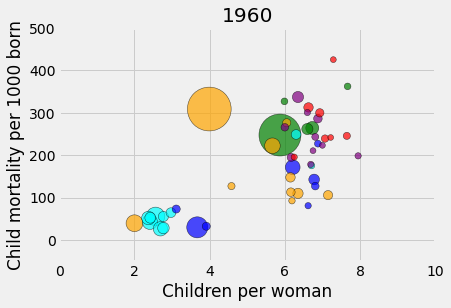

In [27]:
def stats_by_region(year):
    by_year = stats_for_year(year, population_big_50, fertility, child_mortality)
    w_regions = by_year.merge(countries_info, how='inner', on='Alpha-3 code')
    w_regions_colors = w_regions.merge(color_map, how='inner', on='World-6 region')
    w_regions_colors = w_regions_colors.sort_values(by=['Total population'], ascending=False).reset_index(drop=True)
    return w_regions_colors

def fertility_vs_child_mortality(year):
    """
    Draw a color scatter diagram comparing child mortality and fertility
    """
    siz = stats_for_2010['Total population'].tolist()
    siz_d = [x / 700000 for x in siz]
    with_region = stats_by_region(year)
    colors = with_region['Colors'].tolist()
    plt_colors = color_map['Colors'].tolist()
    plots.scatter(with_region['Children per woman'], with_region['Child mortality'], c=colors, s=siz_d, label='orange', cmap='viridis', alpha=0.7, edgecolors="black")
    plots.title(year)
    plots.xlabel("Children per woman")
    plots.ylabel("Child mortality per 1000 born")
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.show()

    
fertility_vs_child_mortality(1960)

In [28]:
stats_by_region(1960)

,Country,Alpha-3 code,Year,Total population,Children per woman,Child mortality,World-6 region,Colors
0,China,CHN,1960,644450173,3.99,309.00,east_asia_pacific,orange
1,India,IND,1960,449661874,5.87,247.70,south_asia,green
2,United States,USA,1960,186176524,3.67,30.10,america,blue
3,Russia,RUS,1960,119860289,2.56,55.81,europe_central_asia,cyan
4,Japan,JPN,1960,92500754,2.00,39.70,east_asia_pacific,orange
5,Indonesia,IDN,1960,87792512,5.67,222.40,east_asia_pacific,orange
6,Germany,DEU,1960,73179665,2.41,42.87,europe_central_asia,cyan
7,Brazil,BRA,1960,72493585,6.21,171.80,america,blue
8,United Kingdom,GBR,1960,52410496,2.69,26.60,europe_central_asia,cyan
9,Italy,ITA,1960,49714962,2.37,52.00,europe_central_asia,cyan


Finally, the slider in the image below allows you to witness how the number of children per woman evolved against the number of child mortalities per 1000 born for each of the top 50 most populous countries, colored by region, beginning in 1960 through 2015. Please move the slider to the right and back as many times as you wish and enjoy this evolution!

In [29]:
import ipywidgets as widgets

# This part takes a few minutes to run because it 
# computes 55 tables in advance: one for each year.
for year in np.arange(1960, 2016):
    stats_by_region(year)

_ = widgets.interact(fertility_vs_child_mortality, 
                     year=widgets.IntSlider(min=1960, max=2015, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2015, min=1960), Output()), _dom_classes=(…